In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
import gspread
import pandas as pd
from oauth2client import service_account
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Conexión a GCP
cred_file = "/content/drive/MyDrive/Mercadolibre-Test/mercadolibre-test-395519-bedbd9e6fee2.json"
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
credentials = service_account.ServiceAccountCredentials.from_json_keyfile_name(cred_file, scope)
client = gspread.authorize(credentials)
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1AJY_-BxosSmbC2-sIQZn9hD5T6BE7QfzThddXId0Tyg/edit#gid=12675925"
spreadsheet = client.open_by_url(spreadsheet_url)

### **CLIENTES**

In [66]:
# Abre la hoja de cálculo por su URL
worksheet = spreadsheet.worksheet("Clientes")
data = worksheet.get_all_values()

# Convierte la lista de listas en un DataFrame de pandas
df_clientes = pd.DataFrame(data[1:], columns=data[0])  # Usamos la primera fila como nombres de columna

In [67]:
df_clientes

,id,Nombre,Pais,edad,Ocupacion,Score,Salario net USD,Estado Civil,Estado (1 activo),Fecha Inactividad,Genero,Device,Nivel Educativo,Carrera
0,1,c1,Colombia,23,Empleado,342,5000,Soltero,1,,F,Huawei,Pregrado,Ingeniero
1,2,c2,Argentina,34,Independiente,654,4600,Soltero,1,,F,Iphone,Posgrado,Administrador
2,3,c3,Mexico,40,Empleado,300,8000,Soltero,1,,F,Iphone,Posgrado,Ingeniero
3,4,c4,Brasil,35,Empleado,600,6500,Soltero,1,,f,Samsung,Master,Administrador
4,5,c5,Chile,43,Empleado,430,5000,Soltero,1,,f,Samsung,Pregrado,Ingeniero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,c57,Mexico,22,Estudiante,,,Soltero,1,,F,Oppo,Estudiante,Estudiante
57,58,c58,Mexico,20,Estudiante,,,Soltero,1,,F,Samsung,Estudiante,Estudiante
58,59,c59,Mexico,19,Estudiante,,,Soltero,1,,M,Xiaomi,Estudiante,Estudiante
59,60,c60,Mexico,29,,,,,0,05/02/2023,F,Oppo,Pregrado,Administrador


In [68]:
# Realizar estadísticas descriptivas
df_clientes.describe()

,id,Nombre,Pais,edad,Ocupacion,Score,Salario net USD,Estado Civil,Estado (1 activo),Fecha Inactividad,Genero,Device,Nivel Educativo,Carrera
count,61,61,61,61,61,61,61,61,61,61,61,61,61,61
unique,61,61,5,26,7,33,35,9,2,7,6,5,4,5
top,1,c1,Mexico,35,Empleado,,,Soltero,1,,F,Samsung,Pregrado,Administrador
freq,1,1,24,7,31,16,15,35,54,55,23,15,30,21


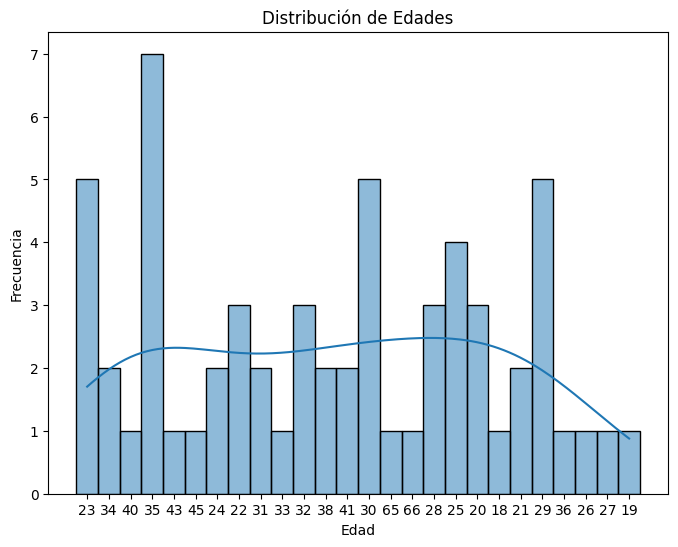

In [69]:
# Crear un histograma de edades
plt.figure(figsize=(8, 6))
sns.histplot(df_clientes["edad"], bins=15, kde=True)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

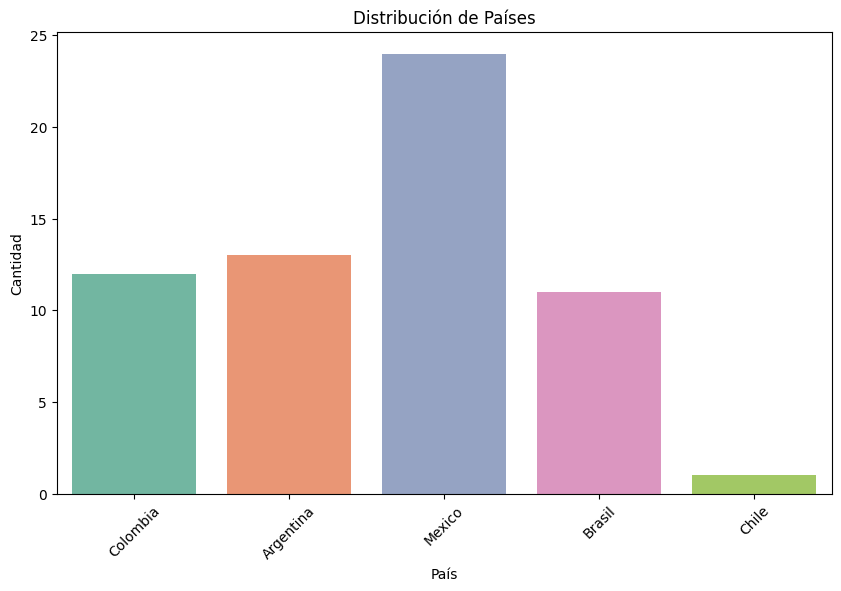

In [70]:
# Crear un gráfico de barras de los países
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clientes, x="Pais", palette="Set2")
plt.title("Distribución de Países")
plt.xlabel("País")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

In [71]:
df_clientes["Pais"].value_counts()
#Los valores son unicos, no requiere limpieza

Mexico       24
Argentina    13
Colombia     12
Brasil       11
Chile         1
Name: Pais, dtype: int64

In [72]:
df_clientes["Ocupacion"].value_counts()
#Se identifican duplicados y valores faltantes.
#Se requiere estandarizar valores (Empleado, Independiente, Estudiante, N/A)

Empleado          31
Estudiante        13
                   9
Independiente      5
in dependiente     1
Soltero            1
emp                1
Name: Ocupacion, dtype: int64

In [73]:
df_clientes["Estado Civil"].value_counts()
#Se identifican duplicados y valores faltantes.
#Se requiere estandarizar valores (Soltero, Casado, N/A)

Soltero     35
Casado      13
Sol          5
             3
Cas          1
Sol          1
 Soltero     1
Cosado       1
Sotero       1
Name: Estado Civil, dtype: int64

In [74]:
df_clientes["Genero"].value_counts()
#Se identifican duplicados.
#Se requiere estandarizar valores (F, M)

F     23
m     14
f     11
M     11
fF     1
mm     1
Name: Genero, dtype: int64

In [75]:
df_clientes["Device"].value_counts()
#Los valores son unicos, no requiere limpieza

Samsung    15
Iphone     12
Xiaomi     12
Oppo       12
Huawei     10
Name: Device, dtype: int64

In [76]:
df_clientes["Nivel Educativo"].value_counts()
#Los valores son unicos, no requiere limpieza

Pregrado      30
Estudiante    12
Master        10
Posgrado       9
Name: Nivel Educativo, dtype: int64

In [77]:
df_clientes["Carrera"].value_counts()
#Los valores son unicos, no requiere limpieza

Administrador    21
Ingeniero        18
Estudiante       12
Medico            8
Contador          2
Name: Carrera, dtype: int64

In [78]:
df_clientes["Salario net USD"].max()
#Se identifican valores incorrectos que deben ser ajustados

'9110ç'

In [79]:
df_clientes["Fecha Inactividad"].value_counts()
#Se debe estandarizar el formato de fechas. (DD-MM-YYYY)

                  55
25/02/2023         1
febrero 2 2023     1
15/01/2023         1
marzo 1 2023       1
05/03/2023         1
05/02/2023         1
Name: Fecha Inactividad, dtype: int64

###**PRODUCTOS**

In [87]:
# Abre la hoja de cálculo por su URL
worksheet = spreadsheet.worksheet("Producto")
data = worksheet.get_all_values()

# Convierte la lista de listas en un DataFrame de pandas
df_productos = pd.DataFrame(data[1:], columns=data[0])  # Usamos la primera fila como nombres de columna

In [63]:
df_productos

,id,nombre,ValorUSD,Cantidad Datos MB,Vigencia (dias),Telefonia
0,1,Oro,10,20480,30,Pospago
1,2,Plata,8,15360,30,Pospago
2,3,Bronce,6,10240,30,Pospago
3,4,Basico,2,8192,30,Pospago
4,5,Pre-Basico,1,1024,1,Prepago
5,6,Pre-Basico 1,2,2048,7,Prepago
6,7,Pre-Basico 2,3,3072,15,Prepago
7,8,Pre-Avanzado 1,4,4096,1,Prepago
8,9,Pre-Avanzado 2,5,5120,7,Prepago
9,10,Pre-Avanzado 3,6,6144,15,Prepago


In [90]:
df_productos.describe()

,id,nombre,ValorUSD,Cantidad Datos MB,Vigencia (dias),Telefonia
count,10,10,10,10,10,10
unique,10,10,8,10,4,2
top,1,Oro,6,20480,30,Prepago
freq,1,1,2,1,4,6


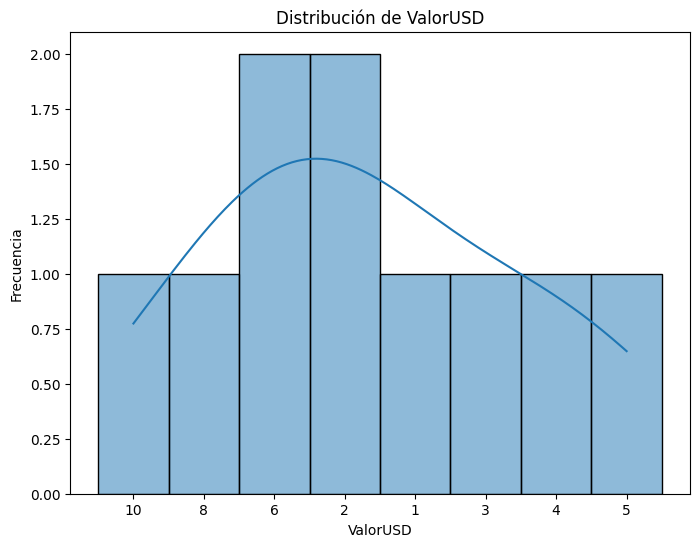

In [80]:
# Crear un histograma de ValorUSD
plt.figure(figsize=(8, 6))
sns.histplot(df_productos["ValorUSD"], bins=10, kde=True)
plt.title("Distribución de ValorUSD")
plt.xlabel("ValorUSD")
plt.ylabel("Frecuencia")
plt.show()

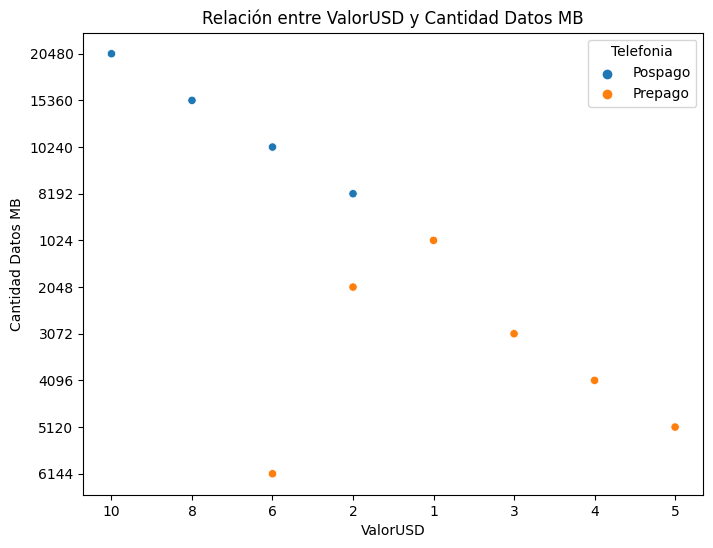

In [82]:
# Crear un scatter plot entre ValorUSD y Cantidad Datos MB
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_productos, x="ValorUSD", y="Cantidad Datos MB", hue="Telefonia")
plt.title("Relación entre ValorUSD y Cantidad Datos MB")
plt.xlabel("ValorUSD")
plt.ylabel("Cantidad Datos MB")
plt.legend(title="Telefonia")
plt.show()

###**COMPRAS**

In [89]:
# Abre la hoja de cálculo por su URL
worksheet = spreadsheet.worksheet("Compras")
data = worksheet.get_all_values()

# Convierte la lista de listas en un DataFrame de pandas
df_compras = pd.DataFrame(data[1:], columns=data[0])  # Usamos la primera fila como nombres de columna

In [56]:
df_compras

,id,cust_id,prod_id,Gasto,FechaCompra,Mediopago (Tarjeta o Cash)
0,1,1,2,8,01/01/2023,T
1,2,2,3,6,01/01/2023,T
2,3,3,4,2,01/01/2023,T
3,4,4,2,8,01/01/2023,T
4,5,5,3,6,01/01/2023,T
...,...,...,...,...,...,...
389,390,61,10,6,01/02/2023,C
390,391,61,10,6,01/02/2023,C
391,392,61,5,1,01/03/2023,C
392,393,61,5,1,01/03/2023,C


In [91]:
df_compras.describe()

,id,cust_id,prod_id,Gasto,FechaCompra,Mediopago (Tarjeta o Cash)
count,394,394,394,394,394,394
unique,394,60,10,8,3,2
top,1,32,5,1,01/01/2023,C
freq,1,9,96,96,139,311
